In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

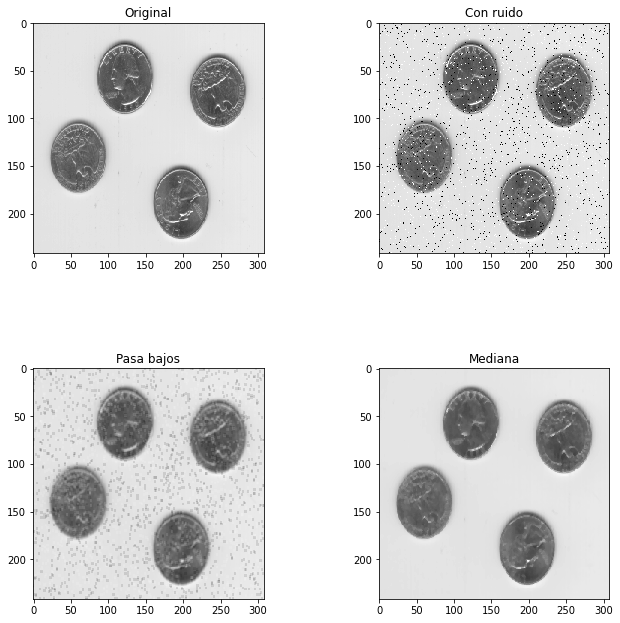

In [46]:
img = cv2.imread('eight.tif')
fig_1 = plt.figure(figsize =(8,8))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.5, wspace = 0.5)
#Imagen original
fig_1.add_subplot(2,2,1)
plt.title("Original")
plt.imshow(img,interpolation='nearest', aspect='auto')

for row in range(0,img.shape[0]):
  saltpepper_noise = np.random.uniform(low=0,high=255,size=img.shape[1]);
  for col in range(0,img.shape[1]):
    noise_sample = saltpepper_noise[col]
    if noise_sample <5:
      img[row][col] = [0, 0, 0]
    elif noise_sample >250:
      img[row][col] = [255, 255, 255]
#Imagen con ruido "saltpepper"
fig_1.add_subplot(2,2,2)
plt.title("Con ruido")
plt.imshow(img,interpolation='nearest', aspect='auto')
#Imagen luego de ser filtrada por un LP
kernel = np.ones((3,3),np.float32)/9
filtered = cv2.filter2D(img,-1,kernel)
fig_1.add_subplot(2,2,3)
plt.title("Pasa bajos")
plt.imshow(filtered,interpolation='nearest', aspect='auto')
#Imagen filtrada tomando la mediana
med_filtered = cv2.medianBlur(img,3)
fig_1.add_subplot(2,2,4)
plt.title("Mediana")
plt.imshow(med_filtered,interpolation='nearest', aspect='auto')
plt.show()


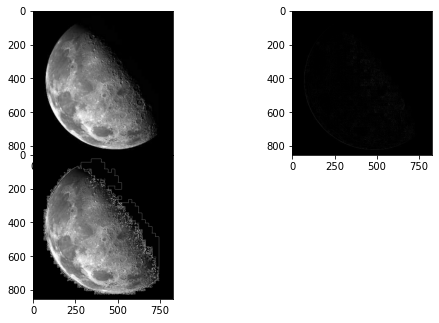

In [55]:
moon_img = cv2.imread('moon.png')
fig_2 = plt.figure()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0.5)
fig_2.add_subplot(2,2,1)
plt.imshow(moon_img,cmap='gray', vmin=0, vmax=255)
#Filtro Laplaciano
kernel = np.array([
                   [0,1,0],
                   [1,-4,1],
                   [0,1,0]
])
hp_filtered = cv2.filter2D(moon_img,-1,kernel)
hp_filtered[hp_filtered < 0] = 0
fig_2.add_subplot(2,2,2)
plt.imshow(hp_filtered,cmap='gray', vmin=0, vmax=255)

#item c
sharpened_img1 =moon_img - hp_filtered
#print(sharpened_img1[400][400:450])
fig_2.add_subplot(2,2,3)
plt.imshow(sharpened_img1,cmap='gray', vmin=0, vmax=255)
plt.show()
